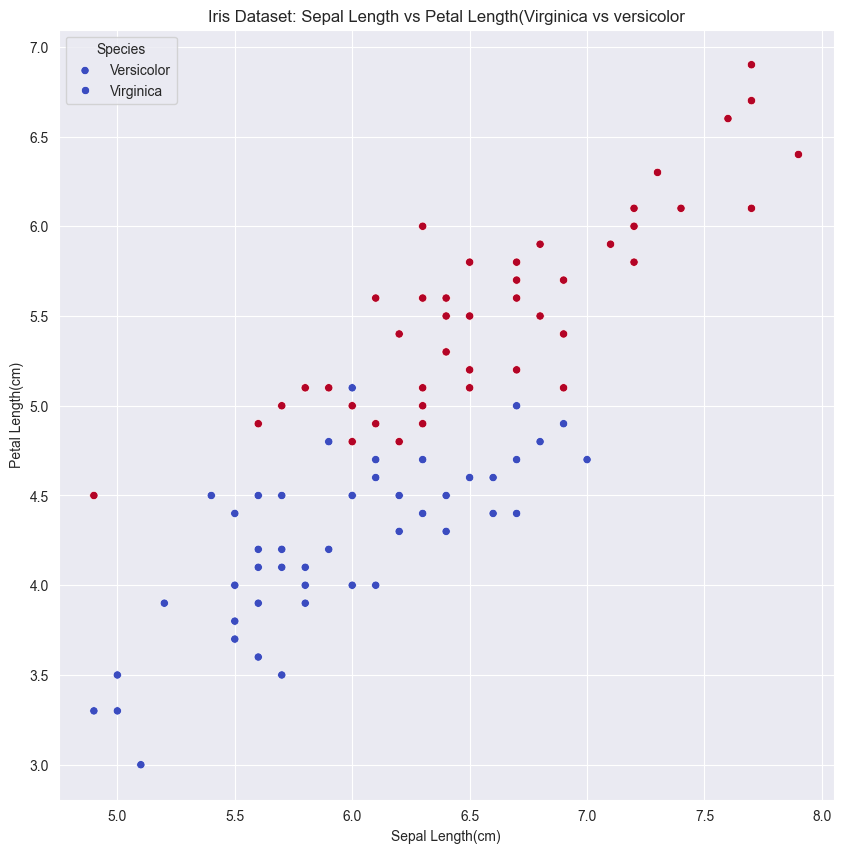

In [26]:
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# loading the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# filtering the datasets to get only two species (Virginica and Versicolor)
df = df[df['species'].isin([1, 2])] # 1 = versicolor, 2= virginica
# selecting the features
X = df[['sepal length (cm)', 'petal length (cm)']]
y = df['species']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scatter plot for the two features
plt.figure(figsize = (10,10))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='coolwarm')
plt.title("Iris Dataset: Sepal Length vs Petal Length(Virginica vs versicolor")
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Petal Length(cm)")
plt.legend(title="Species", labels=['Versicolor', 'Virginica'])
plt.show()


In [27]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initializing the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
# Train the classifier on the training data
knn.fit(X_train, y_train)
# predicting the species on the test data
y_pred = knn.predict(X_test)
# calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of k-NN classifier: {accuracy*100:.2f}%')


Accuracy of k-NN classifier: 85.00%


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


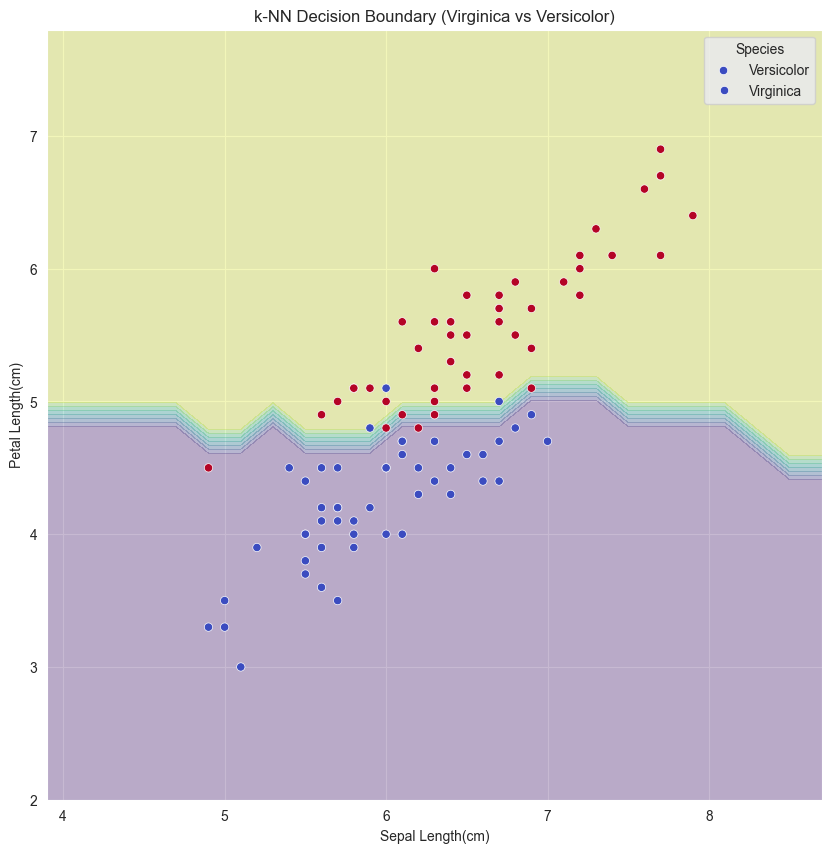

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


# reducing the resolution of the mesh grid
x_min, x_max =X['sepal length (cm)'].min() -1, X['sepal length (cm)'].max() + 1
y_min, y_max =X['petal length (cm)'].min() -1, X['petal length (cm)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

# predicting the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plotting the decision boundary
plt.figure(figsize = (10,10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='coolwarm')
plt.title("k-NN Decision Boundary (Virginica vs Versicolor)")
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Petal Length(cm)")
plt.legend(title="Species", labels=['Versicolor', 'Virginica'])
plt.show()

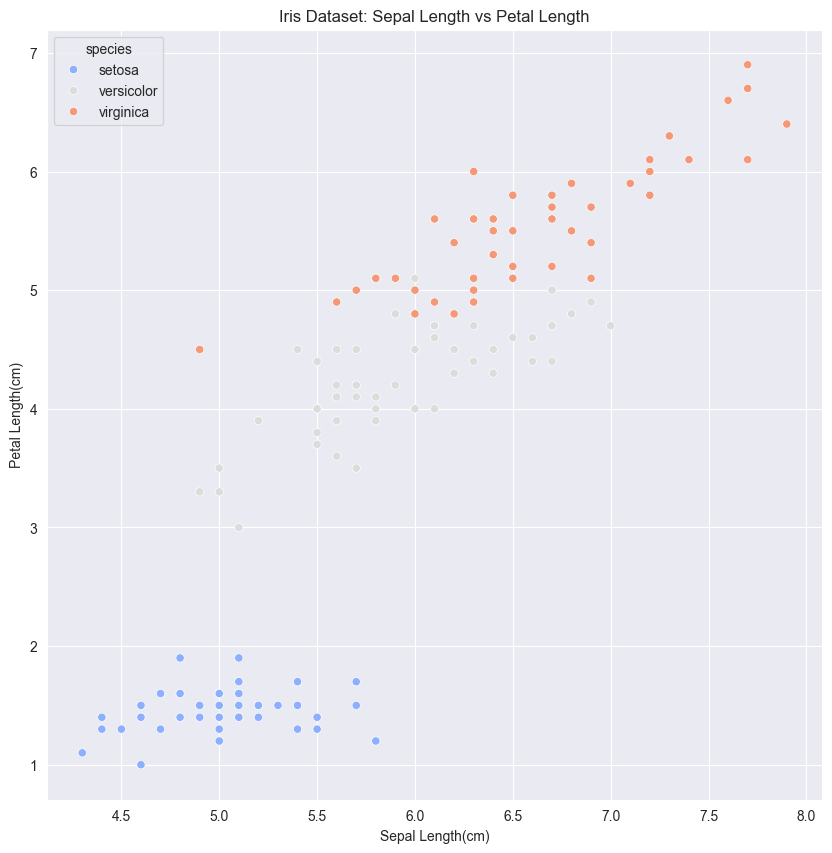

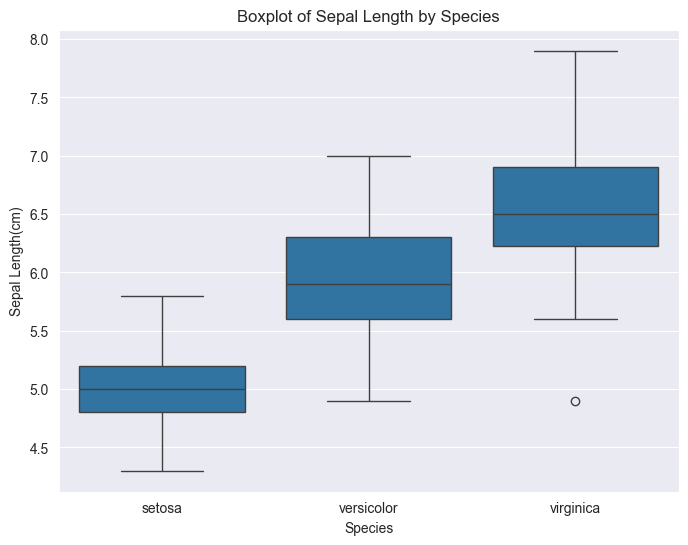

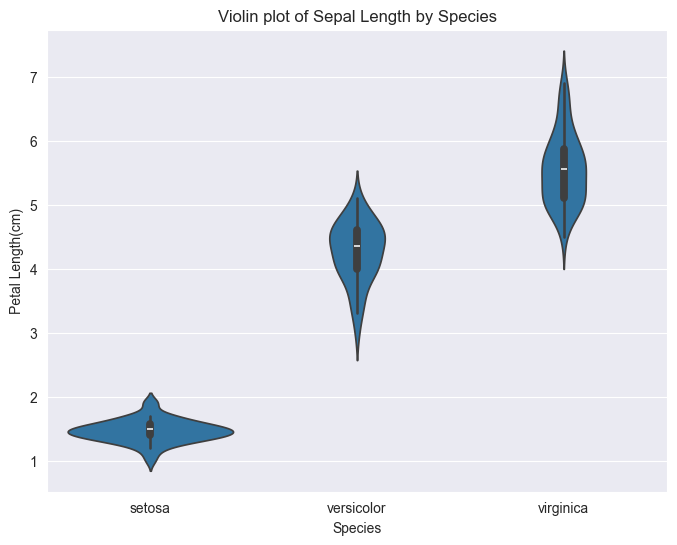

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# loading the iris dataset
iris = datasets.load_iris()
df =pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
# mapping target labels to species name
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['species'].map(species_map)
# extracting sepal_length and petal_length
df_selected = df[['sepal length (cm)', 'petal length (cm)', 'species']]
# plotting the scatter
plt.figure(figsize = (10,10))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df_selected, palette='coolwarm')
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Petal Length(cm)")
plt.title("Iris Dataset: Sepal Length vs Petal Length")
plt.show()

# plotting the boxplot
plt.figure(figsize = (8,6))
sns.boxplot(x='species', y='sepal length (cm)', data=df_selected)
plt.xlabel('Species')
plt.ylabel('Sepal Length(cm)')
plt.title("Boxplot of Sepal Length by Species")
plt.show()

# plotting the violin
plt.figure(figsize = (8,6))
sns.violinplot(x='species', y='petal length (cm)', data=df_selected)
plt.xlabel('Species')
plt.ylabel('Petal Length(cm)')
plt.title("Violin plot of Sepal Length by Species")
plt.show()

In [32]:
import numpy as np
from sklearn.datasets import load_iris

# extracting features and target variable
X = df_selected[['sepal length (cm)', 'petal length (cm)']].values
y = df_selected['species'].values

# splitting the data into training and validation datasets (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# outputting the resulting datasets to confirm the split
print(f"Training data (X_train) shape: {X_train.shape}")
print(f"Validation data (X_val) shape: {X_val.shape}")
print(f"Training labels (y_train) shape: {y_train.shape}")
print(f"Validation labels (y_val) shape: {y_train.shape}")


Training data (X_train) shape: (112, 2)
Validation data (X_val) shape: (38, 2)
Training labels (y_train) shape: (112,)
Validation labels (y_val) shape: (112,)


In [33]:
from sklearn.preprocessing import StandardScaler
# initializing the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the validation data using the same scaler(without fitting)
X_val_scaled = scaler.transform(X_val)

# checking the first few rows of the scaled training data to verify the transformation
print(f"Scaled Training data (first 10 rows:\n", X_train_scaled[:10])

Scaled Training data (first 10 rows:
 [[-1.01827123 -1.39338902]
 [-0.7730102  -1.33550342]
 [-0.03722712  0.74837808]
 [ 0.20803391  0.4010645 ]
 [ 1.06644751  0.51683569]
 [-0.52774918 -1.45127462]
 [-0.52774918 -1.33550342]
 [-0.40511866 -0.06202028]
 [ 0.57592545  0.74837808]
 [ 0.69855596  0.97992047]]


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# training the K-NN models with different values of n_neighbors
neighbors = [1, 3, 5, 7, 9]
# dictionary to store the models and their predictions
models = {}
predictions = {}

# training and predicting for each n_neigbors
for n in neighbors:
    #Create K-NN classifier with n_neigbors
    knn = KNeighborsClassifier(n_neighbors=n)
    # training the model on the training data
    knn.fit(X_train_scaled, y_train)
    # predicting the labels for the validation data
    y_pred = knn.predict(X_val_scaled)
    # storing the models and predictions
    models[n] = knn
    predictions[n] = y_pred
    # calculating and printing the accuracy score for each model
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for {n}-NN: {accuracy:.4f}")


Accuracy for 1-NN: 0.8947
Accuracy for 3-NN: 0.9474
Accuracy for 5-NN: 0.9474
Accuracy for 7-NN: 0.9474
Accuracy for 9-NN: 0.9737


Accuracy: 0.9565
Precision: 1.0000
Recall: 0.9167
F1-score: 0.9565
Binary Classification Metrics


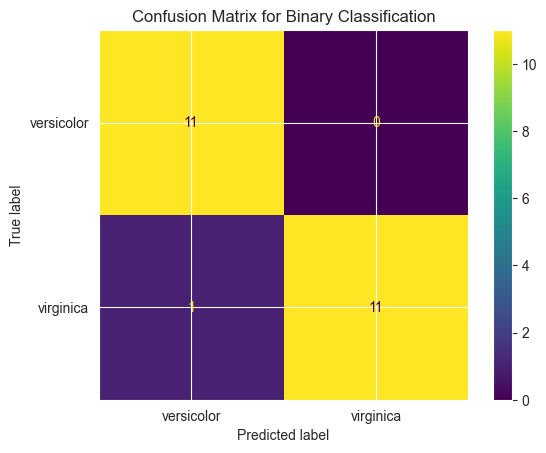

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# filtering to include two classes
binary_idx =(y_val =="versicolor") | (y_val =="virginica")
y_val_binary = y_val[binary_idx]
y_pred_binary = y_pred[binary_idx]

# calculating the metrics for binary classification
accuracy = accuracy_score(y_val_binary, y_pred_binary)
precision = precision_score(y_val_binary, y_pred_binary, pos_label='virginica')
recall = recall_score(y_val_binary, y_pred_binary, pos_label='virginica')
f1 = f1_score(y_val_binary, y_pred_binary, pos_label='virginica')

# displaying the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Binary Classification Metrics")

# confusion Matrix
cm = confusion_matrix(y_val_binary, y_pred_binary, labels=['versicolor', 'virginica'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['versicolor','virginica'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for Binary Classification')
plt.show()



Multiclass Classification Metrics:
Accuracy: 0.9737
Precision (macro): 0.9722
Recall (macro): 0.9722
F1-score (macro): 0.9710


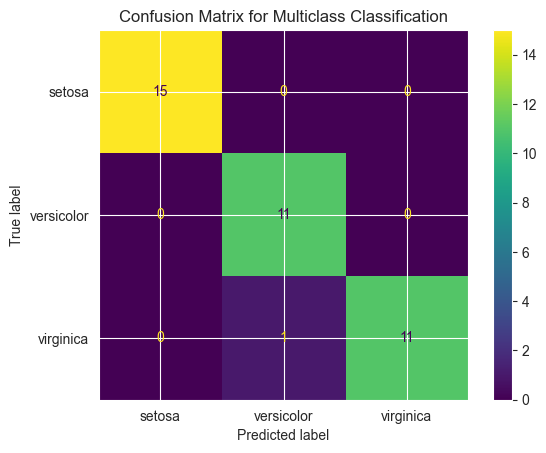

In [47]:
# Calculating metrics for multiclass classification
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average="macro")  # Use 'micro', 'macro', or 'weighted'
recall = recall_score(y_val, y_pred, average="macro")
f1 = f1_score(y_val, y_pred, average="macro")

# Displaying the results
print(f"Multiclass Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=["setosa", "versicolor", "virginica"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["setosa", "versicolor", "virginica"])
disp.plot(cmap="viridis")
plt.title("Confusion Matrix for Multiclass Classification")
plt.show()

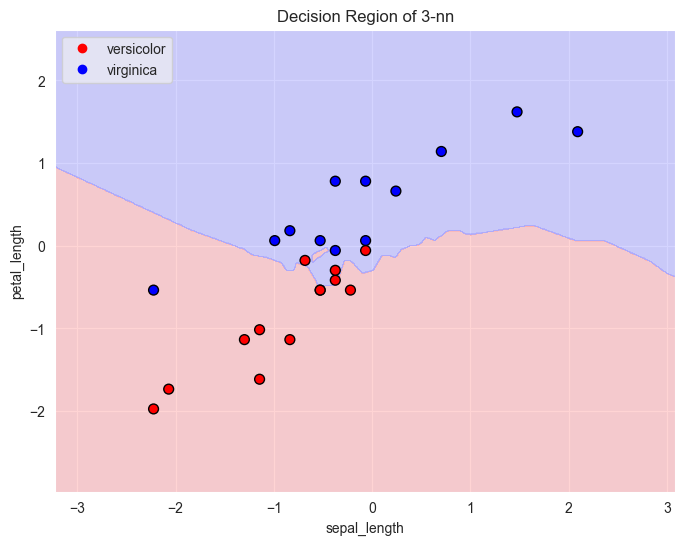

In [50]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data[:, [0, 2]]  # Select sepal length and petal length
y = iris.target

# Filter for "versicolor" and "virginica"
X = X[y != 0]  # Exclude "setosa"
y = y[y != 0]  # Keep only 1 and 2
y = y - 1      # Relabel as 0 ("versicolor") and 1 ("virginica")

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train the k-NN model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Function to plot the decision region
def plot_decision_regions(X, y, model, title="Decision Region"):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=ListedColormap(["red", "blue"]), s=50)
    plt.title(title)
    plt.xlabel("sepal_length")
    plt.ylabel("petal_length")
    plt.legend(handles=scatter.legend_elements()[0], labels=["versicolor", "virginica"], loc="upper left")
    plt.show()

# Plot decision regions using validation data
plot_decision_regions(X_val, y_val, knn, title="Decision Region of 3-nn")

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
from matplotlib.colors import ListedColormap
import pandas as pd

# Define classifiers
classifiers = {
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Metrics storage
metrics = []

# Train, predict, and evaluate each model
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train
    y_pred = clf.predict(X_val)  # Predict
     # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Append to metrics list
    metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

    # Print confusion matrix
    print(f"Confusion Matrix for {name}:\n", confusion_matrix(y_val, y_pred))

# Display metrics in a DataFrame
metrics_df = pd.DataFrame(metrics)
print("\nMetrics Summary:")
print(metrics_df)

Confusion Matrix for k-NN:
 [[ 9  4]
 [ 1 11]]
Confusion Matrix for Logistic Regression:
 [[12  1]
 [ 1 11]]
Confusion Matrix for SVM:
 [[11  2]
 [ 1 11]]
Confusion Matrix for Decision Tree:
 [[11  2]
 [ 2 10]]
Confusion Matrix for Random Forest:
 [[11  2]
 [ 1 11]]

Metrics Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
0                 k-NN      0.80   0.733333  0.916667  0.814815
1  Logistic Regression      0.92   0.916667  0.916667  0.916667
2                  SVM      0.88   0.846154  0.916667  0.880000
3        Decision Tree      0.84   0.833333  0.833333  0.833333
4        Random Forest      0.88   0.846154  0.916667  0.880000


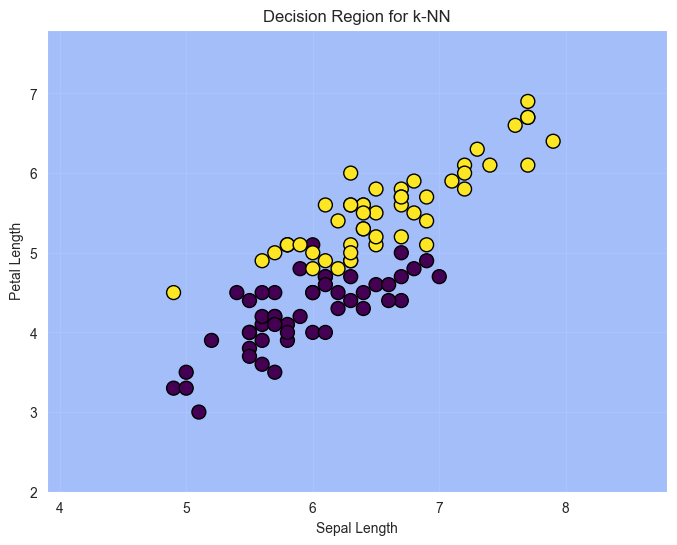

In [52]:
# Assuming `knn` is your trained k-NN model
# Create a mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # First feature (sepal length)
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Second feature (petal length)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis', s=100)
plt.title("Decision Region for k-NN")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

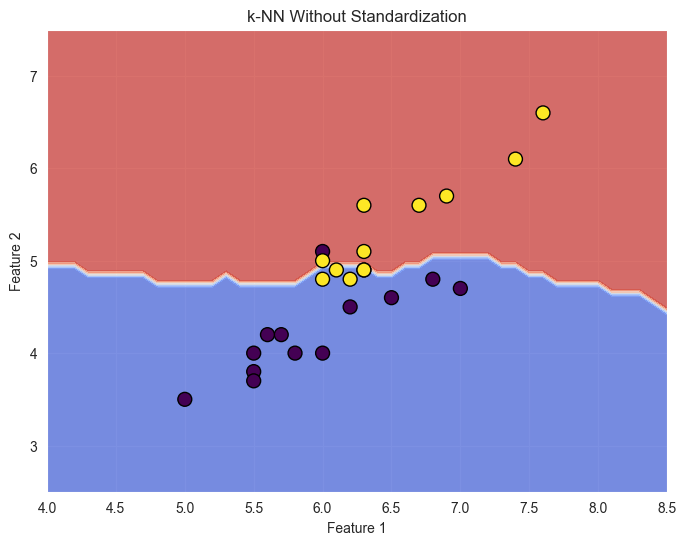

In [54]:
# Train-test split without standardization
X_train_ns, X_val_ns, y_train_ns, y_val_ns = train_test_split(X, y, test_size=0.25, random_state=42)

# Train models without standardization
results_without_standardization = {}

# k-NN
knn_ns = KNeighborsClassifier(n_neighbors=3)
knn_ns.fit(X_train_ns, y_train_ns)
y_pred_ns_knn = knn_ns.predict(X_val_ns)
results_without_standardization['k-NN'] = {
    "Accuracy": accuracy_score(y_val_ns, y_pred_ns_knn),
    "Precision": precision_score(y_val_ns, y_pred_ns_knn, average="binary", pos_label=1),
    "Recall": recall_score(y_val_ns, y_pred_ns_knn, average="binary", pos_label=1),
    "F1-Score": f1_score(y_val_ns, y_pred_ns_knn, average="binary", pos_label=1),
}

# Repeat for Logistic Regression, SVM, Decision Tree, Random Forest
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}
for name, clf in classifiers.items():
    clf.fit(X_train_ns, y_train_ns)
    y_pred_ns = clf.predict(X_val_ns)
    results_without_standardization[name] = {
        "Accuracy": accuracy_score(y_val_ns, y_pred_ns),
        "Precision": precision_score(y_val_ns, y_pred_ns, average="binary", pos_label=1),
        "Recall": recall_score(y_val_ns, y_pred_ns, average="binary", pos_label=1),
        "F1-Score": f1_score(y_val_ns, y_pred_ns, average="binary", pos_label=1),
    }

# Store the results for comparison
results_with_standardization = {...}  # Replace with previously computed standardized results

# Plot decision regions without standardization
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.75, cmap="viridis")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis", s=100)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Example for k-NN
plot_decision_boundary(knn_ns, X_val_ns, y_val_ns, "k-NN Without Standardization")

In [55]:
from sklearn.metrics import classification_report, accuracy_score

# Train and evaluate models for multi-class classification
methods = {
    "k-NN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(decision_function_shape="ovr"),  # One-vs-Rest for multi-class
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in methods.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Evaluate using multi-class metrics
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)

    results[name] = {
        "Accuracy": accuracy,
        "Precision (Macro)": report["macro avg"]["precision"],
        "Recall (Macro)": report["macro avg"]["recall"],
        "F1-Score (Macro)": report["macro avg"]["f1-score"],
        "Precision (Micro)": report["micro avg"]["precision"] if "micro avg" in report else None,
        "Recall (Micro)": report["micro avg"]["recall"] if "micro avg" in report else None,
        "F1-Score (Micro)": report["micro avg"]["f1-score"] if "micro avg" in report else None,
    }
    # Display the results
import pandas as pd

df_results = pd.DataFrame(results).T
print(df_results)

                     Accuracy  Precision (Macro)  Recall (Macro)  \
k-NN                     0.84           0.847403        0.842949   
Logistic Regression      0.92           0.919872        0.919872   
SVM                      0.88           0.881410        0.881410   
Decision Tree            0.84           0.839744        0.839744   
Random Forest            0.88           0.881410        0.881410   

                     F1-Score (Macro)  Precision (Micro)  Recall (Micro)  \
k-NN                         0.839744                NaN             NaN   
Logistic Regression          0.919872                NaN             NaN   
SVM                          0.880000                NaN             NaN   
Decision Tree                0.839744                NaN             NaN   
Random Forest                0.880000                NaN             NaN   

                     F1-Score (Micro)  
k-NN                              NaN  
Logistic Regression               NaN  
SVM           

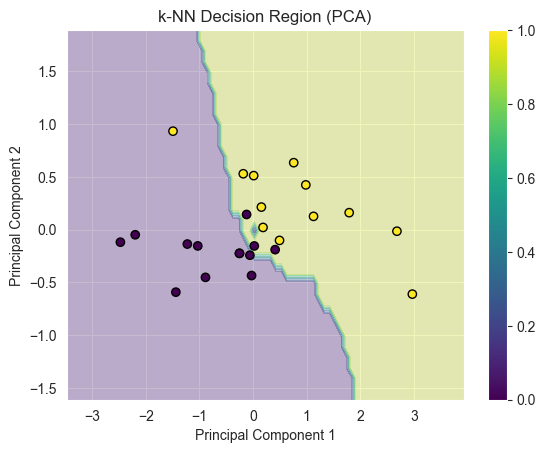

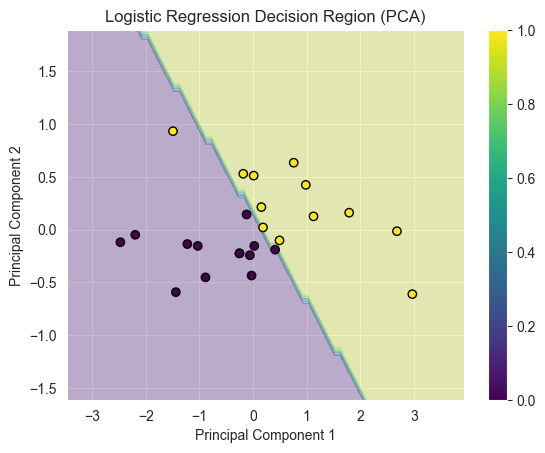

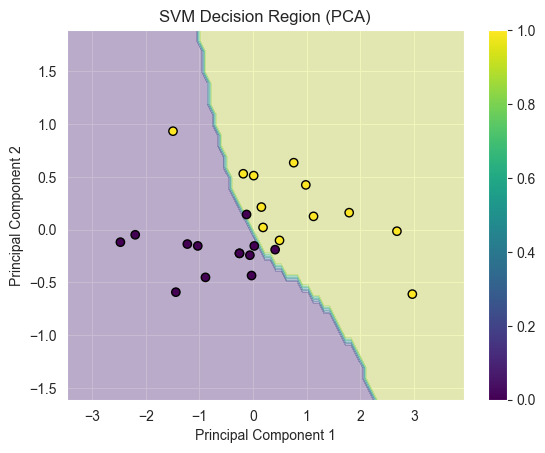

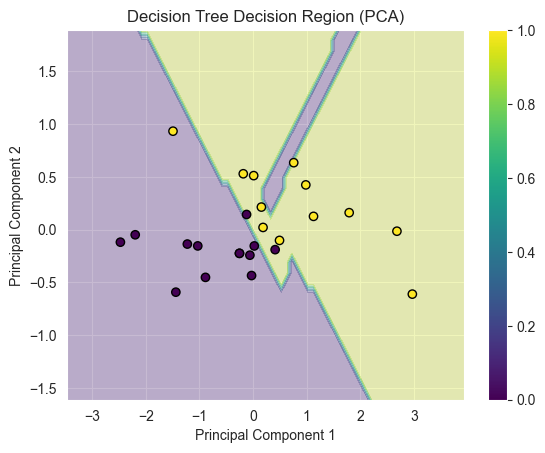

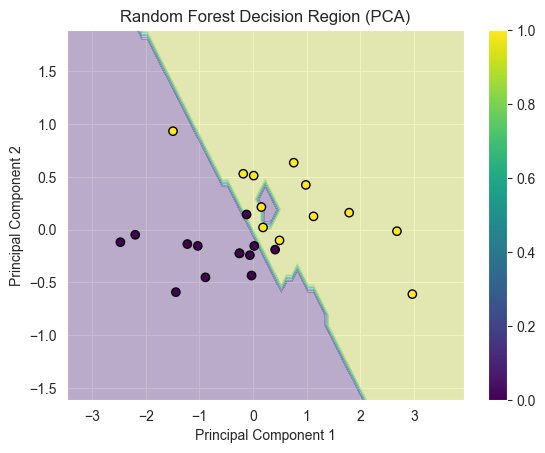

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

def plot_decision_regions_pca(X, y, model, title, resolution=0.1):
    # Apply PCA to reduce to 2 components for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Encode the target labels into numeric values
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Create a mesh grid to plot the decision boundary
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

    # Predict the class for each point in the mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_original = pca.inverse_transform(grid_points)  # Transform back to the original feature space
    Z = model.predict(grid_points_original)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, edgecolors='k', cmap=plt.cm.viridis)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

# Assuming X_train, X_val, y_train, y_val are defined and models are trained
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)

# Visualize for each model
for name, model in methods.items():
    plot_decision_regions_pca(X_val_std, y_val, model, title=f"{name} Decision Region (PCA)")
